# How much of an improvement is Javy Baez for the tigers?
A statistcal look at the Tigers shortstops over the years compared to Baez.

We will be using PyBaseball to do our analysis!
<ol>Things to do
<li>Get SS data for the Tigers since 2014 (Baez's first year)
<li>Get Baez's stats for each year he played
<li>Compare!
</ol>

In [83]:
import pybaseball as pb 
import pandas as pd
from pybaseball.plotting import plot_bb_profile
import matplotlib.pyplot as plt
pb.cache.enable()

In [84]:
# lets get baez Id
pb.playerid_lookup(last="Baez", first="Javier")

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,baez,javier,595879,baezj001,baezja01,12979,2014.0,2021.0


In [85]:
# put his id into as a variable in case we need again
baez = 595879
baez_batting = pb.statcast_batter(start_dt="2014-01-01", end_dt="2021-12-01", player_id=baez)
# make sure we got something back
baez_batting.shape

Gathering Player Data


(12485, 92)

# Tigers data will be coming from FanGraphs 
https://www.fangraphs.com/leaders.aspx?pos=ss&stats=bat&lg=all&qual=0&type=8&season=2021&month=0&season1=2014&ind=0&team=6&rost=0&age=0&filter=&players=0&startdate=2014-01-01&enddate=2021-12-31

<p> Now that we have both Javier Baez and the players who have played games at shortstop for the Tigers since Javy's debut in 2014 lets compare!

## Lets look at Javy's stats season by season

In [86]:
# lets filter season by season

javy2014 = baez_batting.loc[baez_batting['game_date'].str.contains("2014")]
javy2015 = baez_batting.loc[baez_batting['game_date'].str.contains("2015")]
javy2016 = baez_batting.loc[baez_batting['game_date'].str.contains("2016")]
javy2017 = baez_batting.loc[baez_batting['game_date'].str.contains("2017")]
javy2018 = baez_batting.loc[baez_batting['game_date'].str.contains("2018")]
javy2019 = baez_batting.loc[baez_batting['game_date'].str.contains("2019")]
javy2020 = baez_batting.loc[baez_batting['game_date'].str.contains("2020")]
javy2021 = baez_batting.loc[baez_batting['game_date'].str.contains("2021")]

# How has the way pitchers pitched to Javy Evolved?

In [87]:
def pitchCountBar(year):
    pitches = year.pitch_type.value_counts().plot(kind='bar', legend=True)
    pitches.set_xlabel('Pitch Type')
    pitches.set_ylabel('Frequency of Pitch Type')
    pitches.set_title("What pitches were thrown to Javy?")

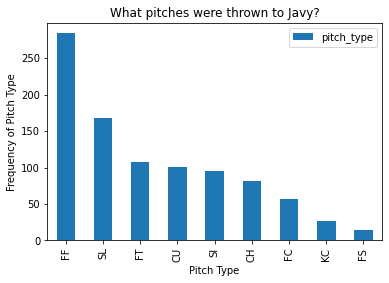

In [88]:
pitchCountBar(javy2014)


In his first year Baez had 229 plate appearences in 52 games. It is no surpise that his most seen pitch was fastball but it is interesting to note that the sinker/2-seam (synonymous with each other) was pretty much tied for his second most seen pitch with the slider. Later on I might do a pitch frequency breakdown for all seasons instead of just the bargraph.

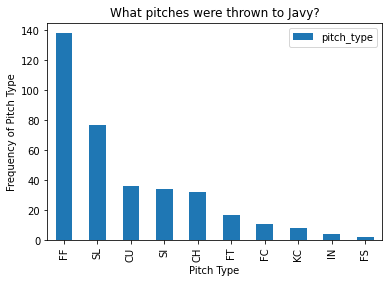

In [89]:
pitchCountBar(javy2015)

Same trends as his rookie season not much to really look at, however he only played 28 games and only had 80 plate appearences. 

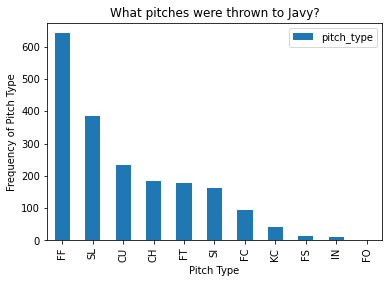

In [90]:
pitchCountBar(javy2016)

His first full season the 4-seam slider combo is still his most seen pitches. All together things seem to be keeping consistent in regards to the pitches he sees.

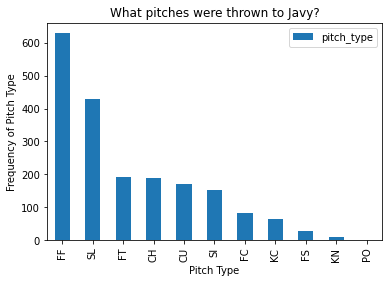

In [91]:
pitchCountBar(javy2017)

Amount of changeups has decreased same top two as its been his whole career.

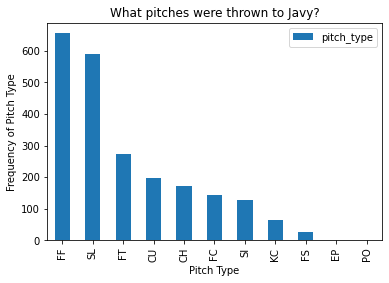

In [92]:
pitchCountBar(javy2018)

In 2018 we see a drastic increase in the amount of sliders Javy is thrown. What is the reason? Not quite sure yet something interesting to dig into later. My guess is a corresponding higher K% and with two full season under his belt teams were better able to evaluate his weaknesses and pithc to them. Despite the increase in sliders he hit a career high 34 hrs and 111 RBI and was elected to teh All Star Game and second in MVP voting.

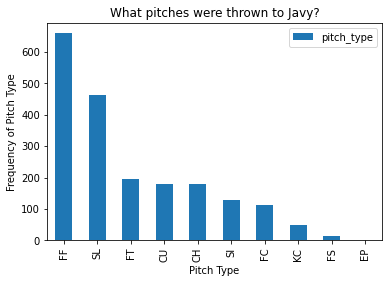

In [93]:
pitchCountBar(javy2019)

Nothing really sticks out here in regards to the pitches he saw other then the amount of sliders he saw decreased. 

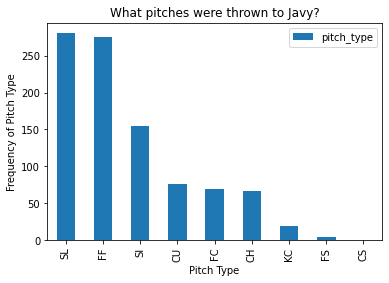

In [94]:
pitchCountBar(javy2020)

Even though this was a shortened season it is interesting to see the number of sliders surpass the number of fastballs thrown to javy.  

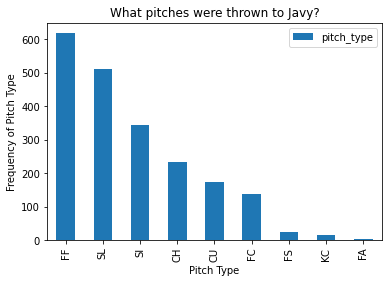

In [95]:
pitchCountBar(javy2021)

Pretty much same distribuiton we have seen throughout his career despite being traded to the Mets before the All Star break.

# To do!
<ol>
<li> Look at actual statistics for Baez
<li> Look at Tigers SS over this time period (difficult to do by year as i cannot figure out how to get who played ss for each game)
<li> Then compare the two (cumulative WAR, wRC+ etc.)

Try to find statcast statistics for tigeres ss by game by game basis.

In [96]:
# all statcast data since 2014
data = pb.statcast(start_dt='2014-01-01', end_dt='2021-12-01')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates
Skipping offseason dates


100%|██████████| 1643/1643 [18:51<00:00,  1.45it/s]


In [98]:
# filter to games only involving tigers
tigers_games = data.loc[data['home_team'].str.contains('DET') | data['away_team'].str.contains('DET')]

In [99]:
# function to split data into seasons
# year is a string
# season is data to filter
def season(year, season):
    return season.loc[season['game_date'].str.contains(year)]

In [100]:
tigers_ss_2014 = season('2014', tigers_games)
tigers_ss_2015 = season('2015',tigers_games)
tigers_ss_2016 = season('2016', tigers_games)
tigers_ss_2017 = season('2017', tigers_games)
tigers_ss_2018 = season('2018', tigers_games)
tigers_ss_2019 = season('2019', tigers_games)
tigers_ss_2020 = season('2020', tigers_games)
tiger2021 = season('2021', tigers_games)

AttributeError: Can only use .str accessor with string values!